# Parameters

In [13]:
#datasets = ['codex-m', 'fb15k-237', 'wnrr', 'wn18', 'yago3-10']
#symbolic_models = [('anyburl', 'AnyBURL')]
#subsymbolic_models = [('complex', 'ComplEx'), ('rescal', 'RESCAL'), ('conve', 'ConvE')]

dataset_name = 'codex-m'

symbolic_name = 'AnyBURL'
symbolic = 'anyburl'

subsymbolic_name = 'ComplEx'
subsymbolic = 'complex'

use_difference_psi = True
bp_threshold = 20

# Imports

In [14]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

# Load Data

In [15]:
df = get_prediction_data(dataset_name, symbolic, subsymbolic)
df.head(10)

,Unnamed: 0,h,h_id,r,r_id,t,t_id,predicted_head,rank_filtered_kge,rank_filtered_kge_0,rank_filtered_kge_1,rank_filtered_kge_2,rank_filtered_kge_3,rank_filtered_kge_4,rank_filtered_anyburl,anyburl_confidence_anyburl,anyburl_confidence_kge,difference_psi
0,0,Q73437,3919,P1412,11,Q1860,39,False,1,1,1,1,1,1,1.0,0.382083,0.382083,1.000000
1,1,Q73437,3919,P1412,11,Q1860,39,True,1162,1111,1649,1187,108,1755,6960.0,0.282316,0.536634,0.526087
2,2,Q355447,1211,P106,2,Q6430706,7345,False,26,33,22,17,27,30,68.0,0.130683,0.130683,1.000000
3,3,Q355447,1211,P106,2,Q6430706,7345,True,59,126,6,8,41,112,3726.0,0.092776,0.281093,0.330056
4,4,Q95076,14262,P106,2,Q10798782,337,False,2,2,2,2,2,2,2.0,0.487678,0.487678,1.000000
5,5,Q95076,14262,P106,2,Q10798782,337,True,801,1236,1701,190,357,519,614.0,0.470588,0.368421,1.277311
6,6,Q289752,16366,P106,2,Q822146,599,False,14,15,17,17,10,12,16.0,0.245908,0.245908,1.000000
7,7,Q289752,16366,P106,2,Q822146,599,True,307,345,280,514,169,226,1173.0,0.245902,0.265845,0.924982
8,8,Q854,1742,P463,1,Q7785,4570,False,2,2,2,2,3,1,7.0,0.454590,0.550027,0.826487
9,9,Q854,1742,P463,1,Q7785,4570,True,19,27,31,6,13,19,63.0,0.454545,0.671491,0.676920


In [16]:
df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge', 'rank_filtered_kge_0', 'rank_filtered_kge_1', 'rank_filtered_kge_2', 'rank_filtered_kge_3', 'rank_filtered_kge_4', 'difference_psi']]
df.head(10)

,h_id,r_id,t_id,predicted_head,rank_filtered_anyburl,rank_filtered_kge,rank_filtered_kge_0,rank_filtered_kge_1,rank_filtered_kge_2,rank_filtered_kge_3,rank_filtered_kge_4,difference_psi
0,3919,11,39,False,1.0,1,1,1,1,1,1,1.000000
1,3919,11,39,True,6960.0,1162,1111,1649,1187,108,1755,0.526087
2,1211,2,7345,False,68.0,26,33,22,17,27,30,1.000000
3,1211,2,7345,True,3726.0,59,126,6,8,41,112,0.330056
4,14262,2,337,False,2.0,2,2,2,2,2,2,1.000000
5,14262,2,337,True,614.0,801,1236,1701,190,357,519,1.277311
6,16366,2,599,False,16.0,14,15,17,17,10,12,1.000000
7,16366,2,599,True,1173.0,307,345,280,514,169,226,0.924982
8,1742,1,4570,False,7.0,2,2,2,2,3,1,0.826487
9,1742,1,4570,True,63.0,19,27,31,6,13,19,0.676920


In [17]:
df = df.dropna()

# Analysis

## create PDF

In [18]:
pdf = PdfPages(os.path.join('analysis', f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf'))

using precalculated values from temp\get_entity_clusters-experiments-codex-m_complex_1-checkpoint_best-pt10.txt


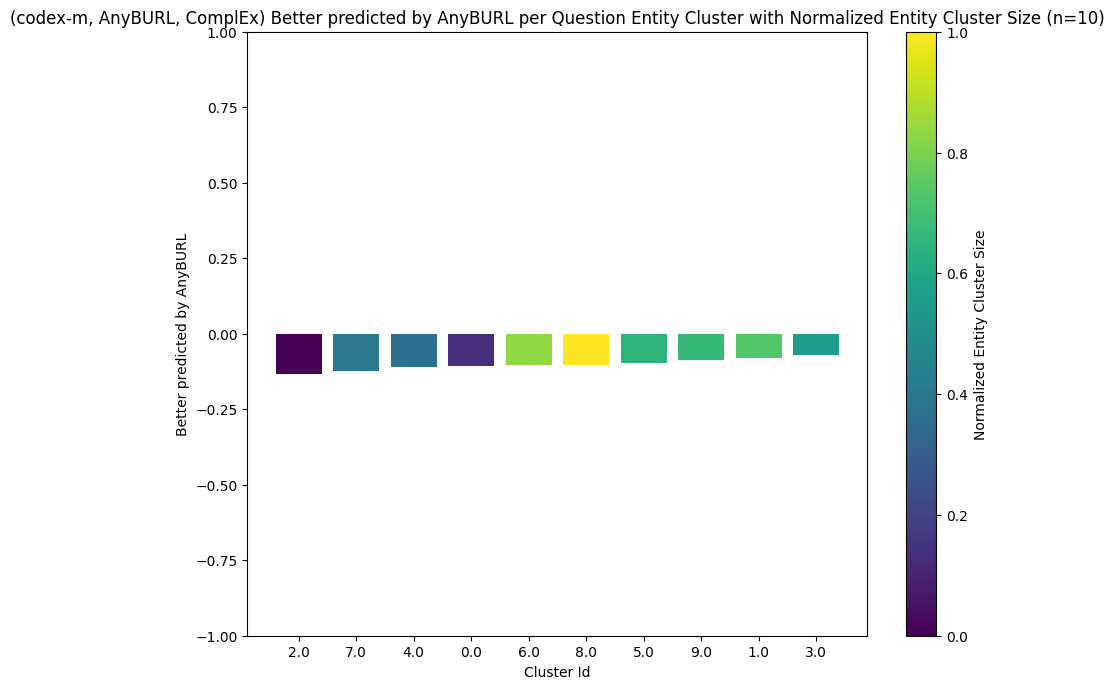

using precalculated values from temp\get_entity_clusters-experiments-codex-m_complex_1-checkpoint_best-pt25.txt


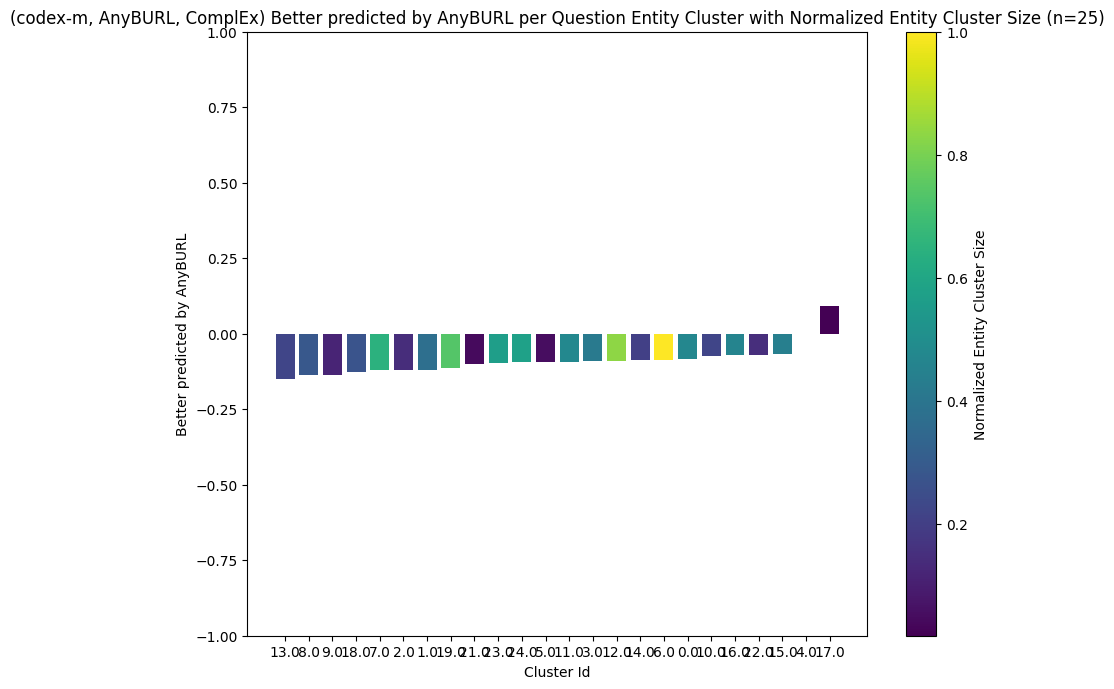

using precalculated values from temp\get_entity_clusters-experiments-codex-m_complex_1-checkpoint_best-pt100.txt


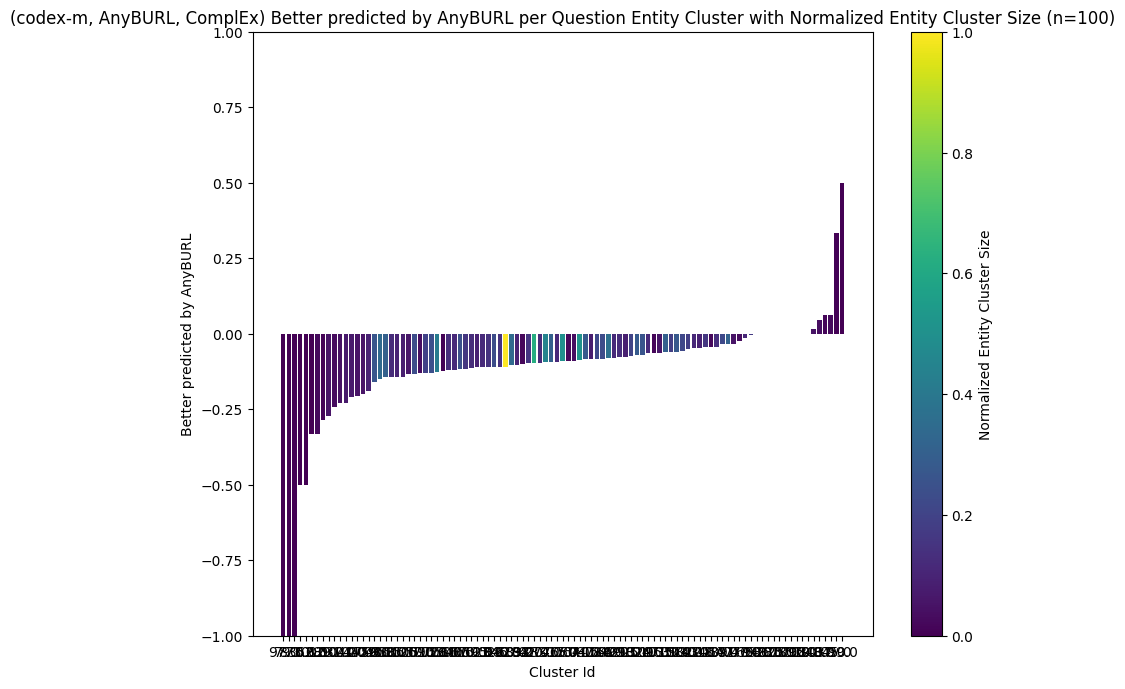

using precalculated values from temp\get_entity_clusters-experiments-codex-m_complex_1-checkpoint_best-pt10.txt


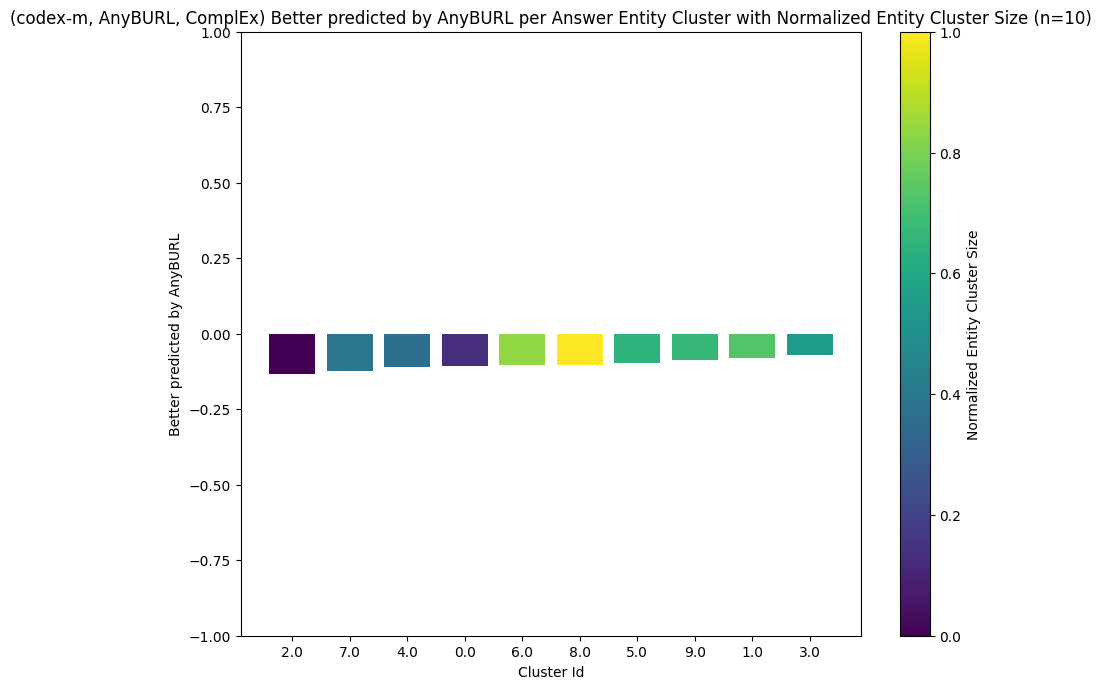

using precalculated values from temp\get_entity_clusters-experiments-codex-m_complex_1-checkpoint_best-pt25.txt


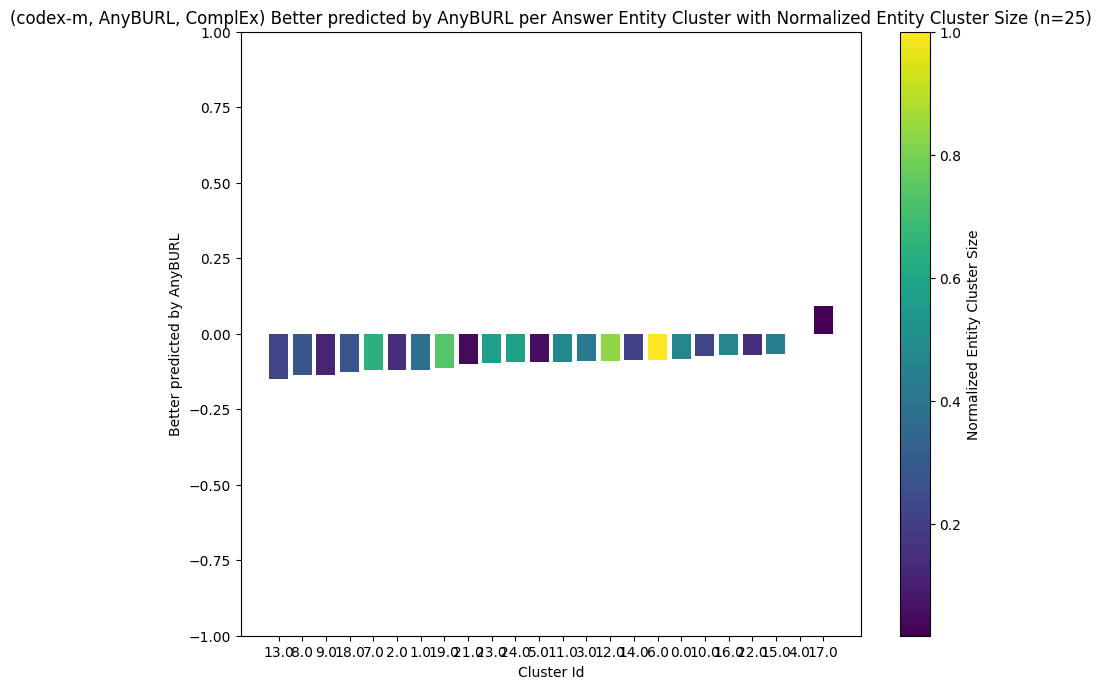

using precalculated values from temp\get_entity_clusters-experiments-codex-m_complex_1-checkpoint_best-pt100.txt


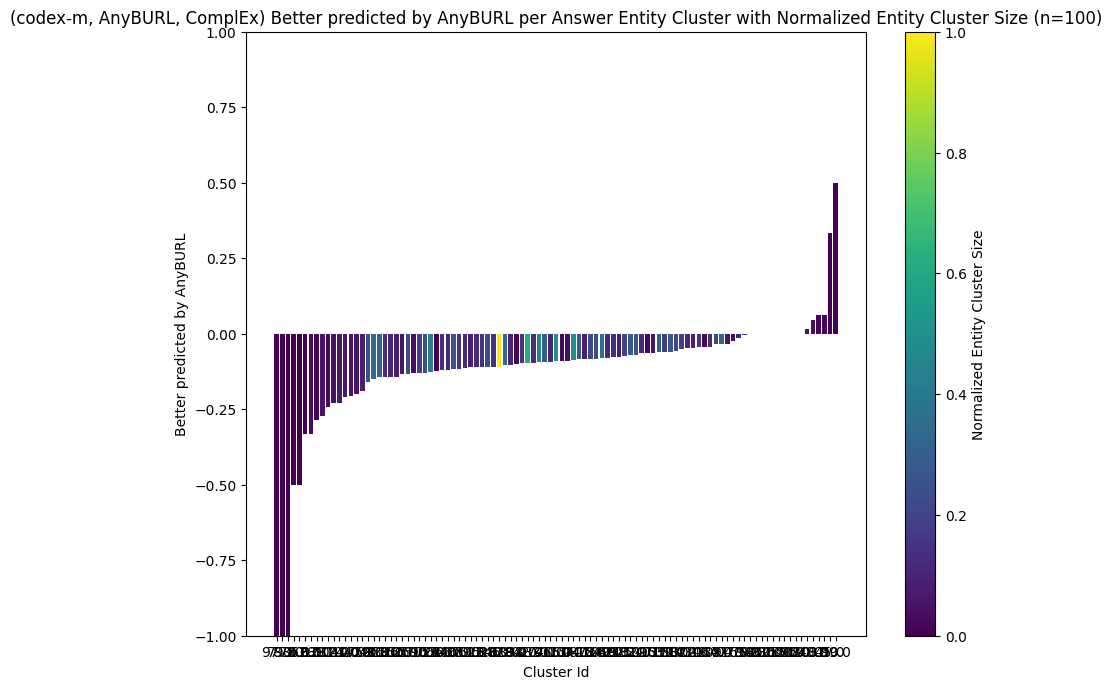

In [19]:
show_all_graphs_wo_sim_score(df, dataset_name, use_difference_psi, bp_threshold)

## close PDF

In [20]:
pdf.close()